In [1]:
!pip install diffusers transformers gradio accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-x1-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype = torch.float16, use_safetensors = True)
pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "dreamlike-art/dreamlike-diffusion-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": null,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [4]:
prompt = "dreamlikeart, An astronaut riding a unicorn wearing colorful pants on mountains with sunset and birds in the sky"
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  dreamlikeart, An astronaut riding a unicorn wearing colorful pants on mountains with sunset and birds in the sky


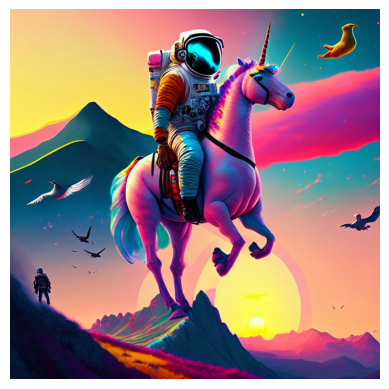

In [5]:
print("[PROMPT]: ", prompt)
plt.imshow(image);
plt.axis('off');

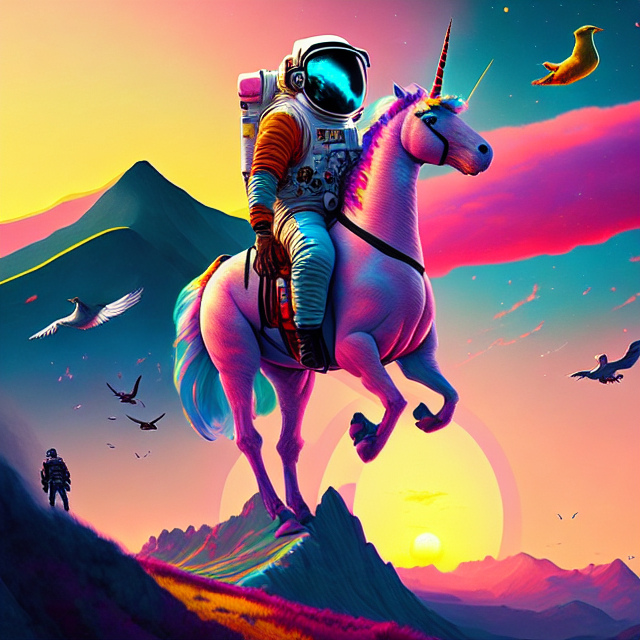

In [6]:
image

In [7]:
prompt = """A girl is sitting on bike & she is accompanied by group of tigers, Make sure to keep it cinematic"""
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

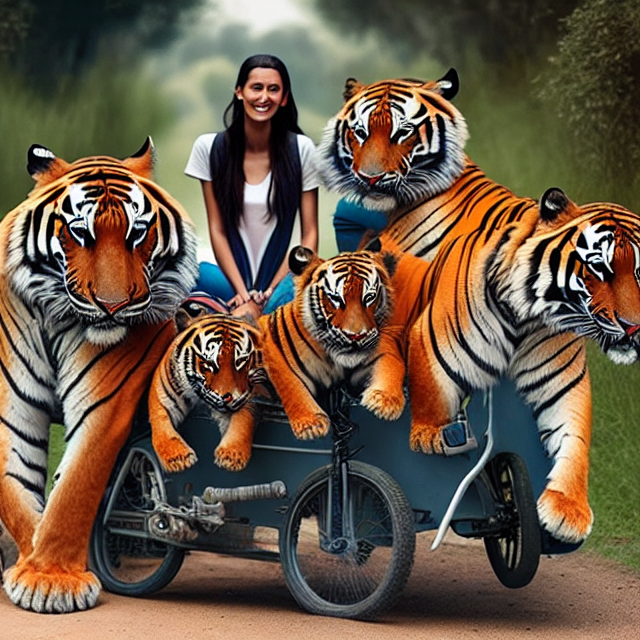

In [8]:
image

[PROMPT]:  A girl is sitting on bike & she is accompanied by group of tigers, Make sure to keep it cinematic


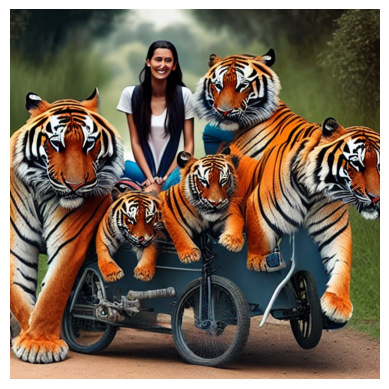

In [9]:
print("[PROMPT]: ", prompt)
plt.imshow(image);
plt.axis('off');

In [10]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [11]:
prompt = "dreamlike, beautiful girl playing the festival of colors, draped in traditional Indian attire, throwing colors"

params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

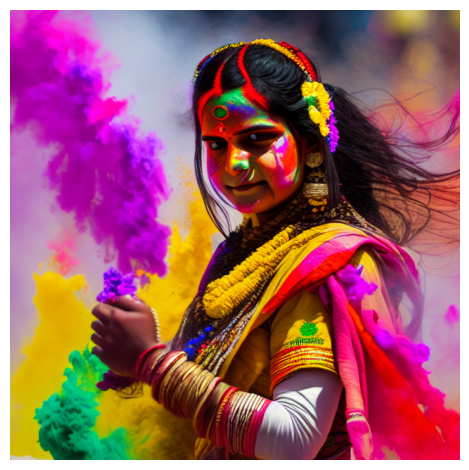

In [12]:
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

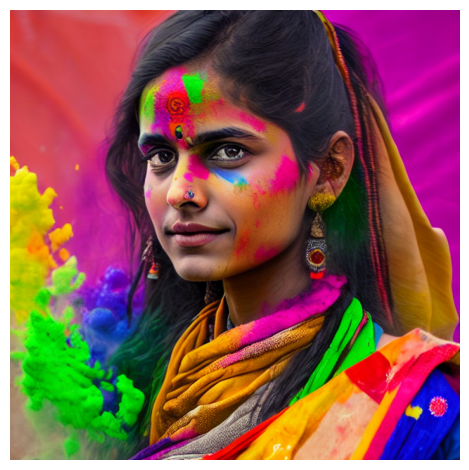

In [13]:
#num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

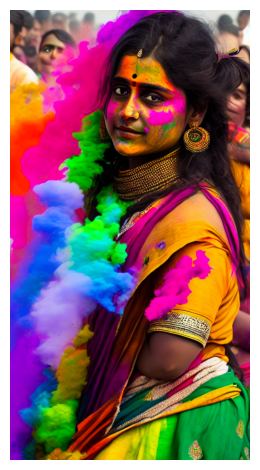

In [14]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

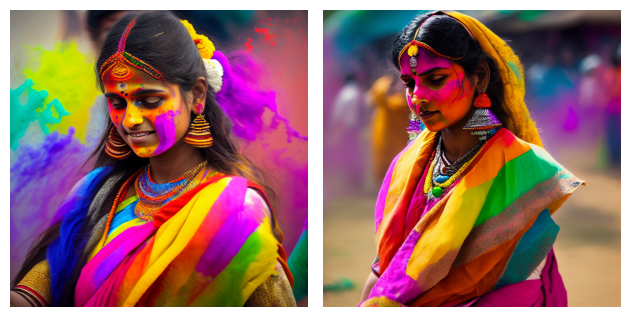

In [15]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

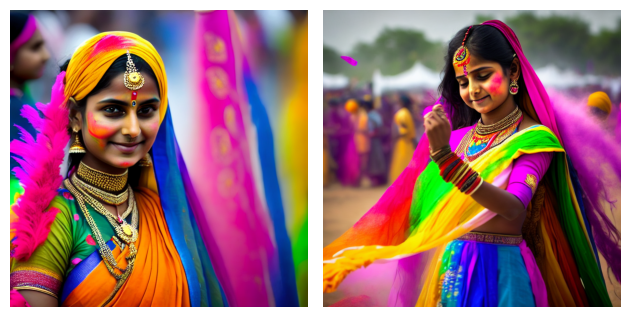

In [16]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt, params)